<h1>Time Series Analysis</h1>

Sumber Dataset: <a href="https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv">Anaytics Vidhya</a>

Dataset ini adalah data penumpang pesawat berdasarkan waktu. Dataset yang paling sederhana untuk memahami cara analisis Time Series.

Time series (TS) adalah koleksi data poin setiap interval waktu konstan. TS berguna untuk prediksi masa depan. TS sedikit berbeda dengan masalah regresi biasa. Pertama, karena TS <b>terikat waktu</b>. Kedua, TS biasa mempunyai <b>pola</b>, seperti variasi jumlah penumpang pada waktu tertentu.

<h1>Eksplorasi Dataset</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
print(df.head())
print('\nJumlah data:', len(df))

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

Jumlah data: 144


Terlihat data ini berisi jumlah penumpang pesawat setiap bulan dari tahun 1949 sebanyak 144 data poin.

Terlihat tabel bulan masih dalam bentuk objek, oleh karena itu perlu diubah agar bisa dimengerti oleh mesin dan dijadikan sebagai kolom indeks.

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('train.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
ts = df['#Passengers']

<h1>Visualisasi Data</h1>

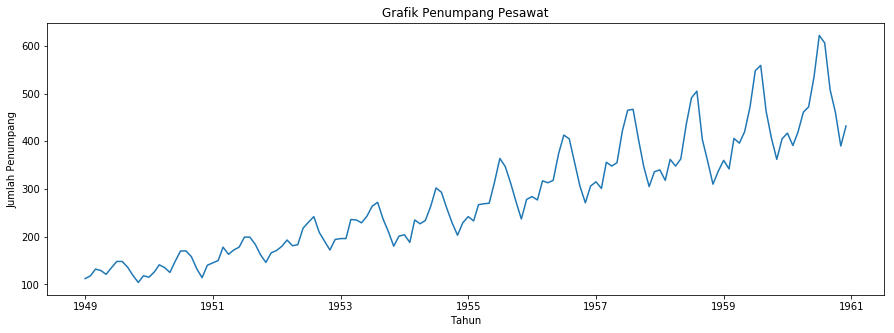

In [6]:
plt.figure(figsize=(15,5))
plt.plot(ts)
plt.title('Grafik Penumpang Pesawat')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penumpang')
plt.show()

Secara umum, jelas terlihat <b>trend data meningkat</b> dengan variasi musiman. Dalam TS, ada yang namanya <i>stationary</i>, yaitu jika atribut statistik, seperti rata-rata dan variansi bernilai konstant seiring waktu. Kita bisa menguji <i>stationary</i> ini dengan dua cara:

<ul>1. <b>Plot <i>rolling statistics</i></b>, yaitu melihat visualisasi data plot dari <i>moving average</i> varians. Lengkapnya: <a href="https://en.wikipedia.org/wiki/Moving_average">Wikipedia</a></ul>
<ul>2. <b>Dickey-Fuller Test</b>, yaitu pengujian informasi statistik. Lengkapnya: <a href="https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test">Wikiepdia</a><ul>    

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Rolling statistics    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey-Fuller test
    print('Hasil Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


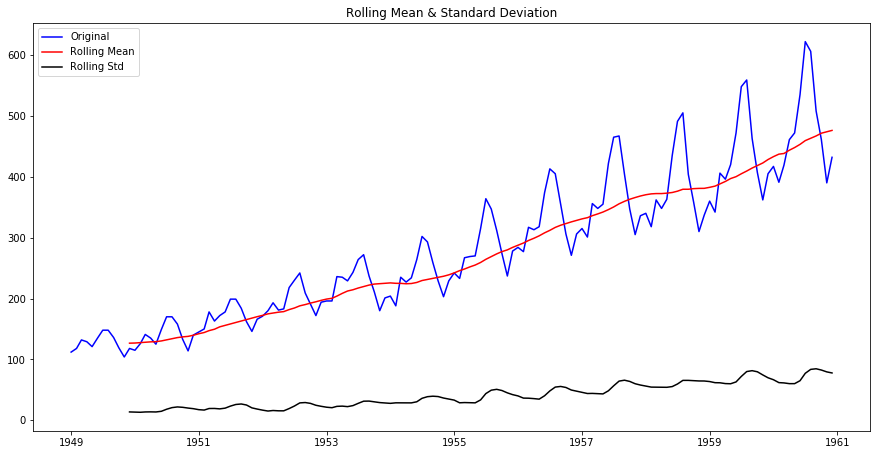

Hasil Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [8]:
plt.figure(figsize=(15,7.5))
test_stationarity(ts)

Dari grafik tersebut dapat dilihat variasi standard deviasi cukup kecil. Namum, rata-rata terus bertambah seiring waktu. Sehingga menunjukkan bahwa data ini <b>tidak <i>stationary</i><b>.

Salah satu cara untuk mengurangi variasi trend adalah dengan <b>transformasi</b>. Transformasi dapat dilakukan dengan logaritmik, akar kuadrat, akar kubik, dan seterusnya. Berikut adalah contoh logaritmik.

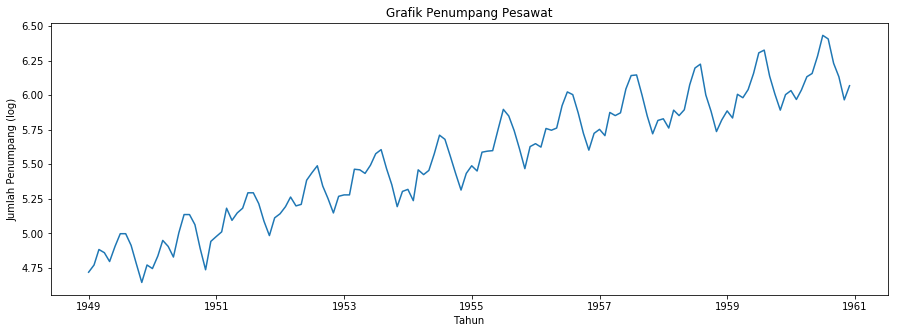

In [9]:
ts_log = np.log(ts)
plt.figure(figsize=(15,5))
plt.plot(ts_log)
plt.title('Grafik Penumpang Pesawat')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penumpang (log)')
plt.show()

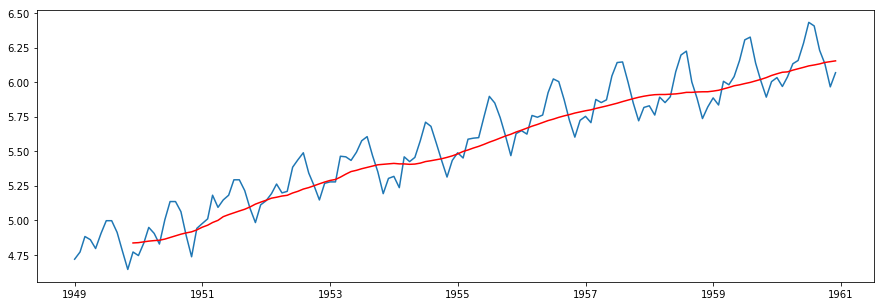

In [10]:
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(15,5))
plt.plot(ts_log)
plt.plot(moving_avg, color='r')
plt.show()

Garis merah menunjukkan rolling mean. Karena kita menggunakan rata-rata dari 12 nilai terakhir, maka rolling mean tidak terdefinisikan untuk 11 nilai pertama dan akan bernilai NaN. Hal ini bisa diatasi.

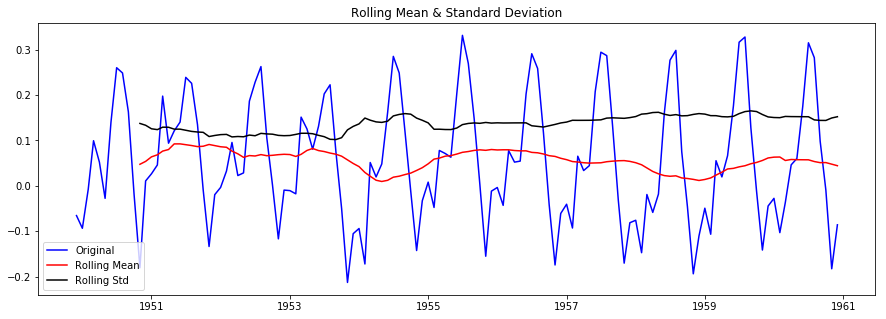

Hasil Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [11]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
plt.figure(figsize=(15,5))
test_stationarity(ts_log_moving_avg_diff)

Uji statistik sekarang kurang dari 5% Critical Value. Jadi dapat disimpulkan 95% dari data ini bersifat <i>stationary</i>.

Kita juga dapat menerapkan <b><i>exponentially weighted moving average</i></b> untuk merapikan nilai <i>moving average</i>.

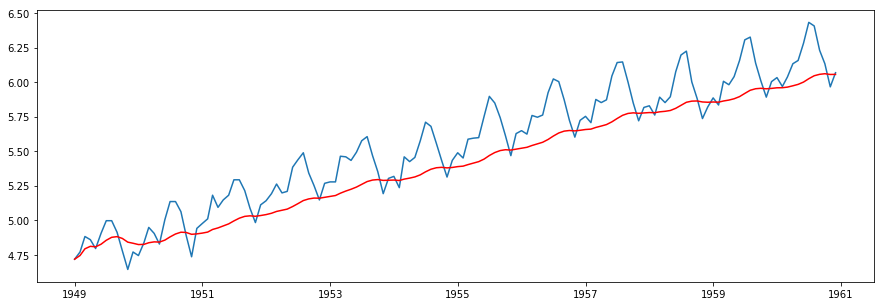

In [12]:
expweighted_avg = pd.DataFrame.ewm(ts_log, halflife=12).mean()
plt.figure(figsize=(15,5))
plt.plot(ts_log)
plt.plot(expweighted_avg, color='r')
plt.show()

Argumen halflife adalah nilai exponential decay. Sekarang bisa hapus nilai ini dari data dan cek <i>stationarity</i>.

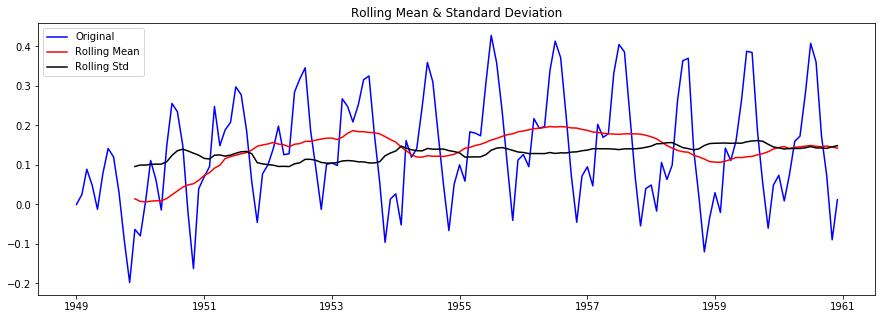

Hasil Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [13]:
ts_log_ewma_diff = ts_log - expweighted_avg
plt.figure(figsize=(15,5))
test_stationarity(ts_log_ewma_diff)
plt.show()

Teknik reduksi trend sederhana tidak selalu dapat bekerja untuk seluruh kasus, apalagi untuk data yang memiliki tingkat musiman (seasonality) yang tinggi. Ada dua cara untuk menanggulanginya:

<ul>1. <b><i>Differencing</i></b>, melihat perbedaan waktu</ul>
<ul>2. <b><i>Decomposition</i></b>, melakukan <i>modelling</i> dari trend dan <i>seasonality</i></ul>

***Differencing***

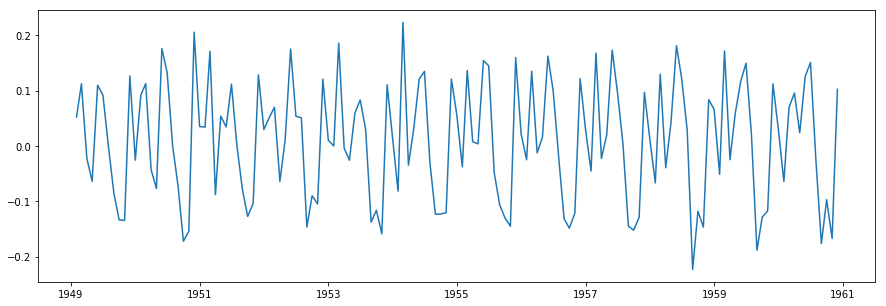

In [14]:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(15,5))
plt.plot(ts_log_diff)
plt.show()

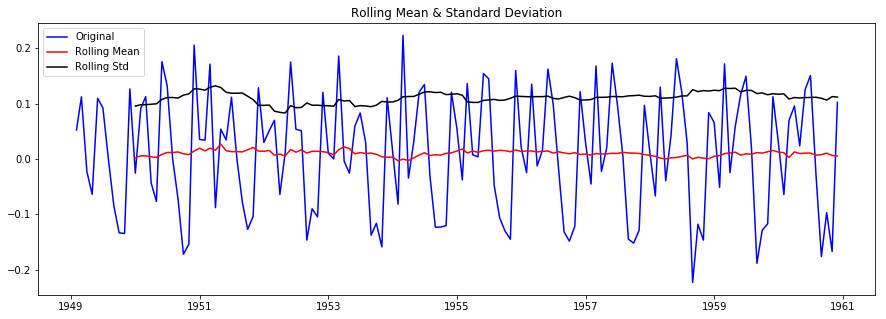

Hasil Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [15]:
ts_log_diff.dropna(inplace=True)
plt.figure(figsize=(15,5))
test_stationarity(ts_log_diff)
plt.show()

***Decomposing***

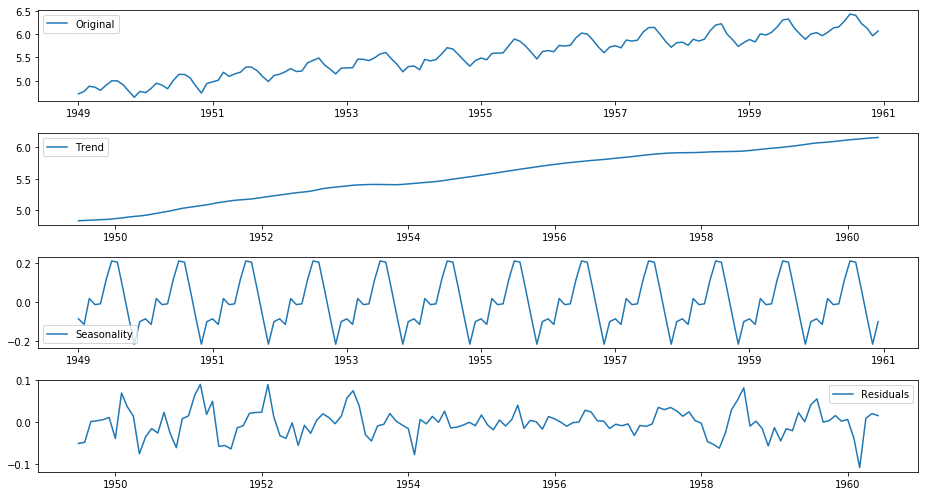

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(13,7))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

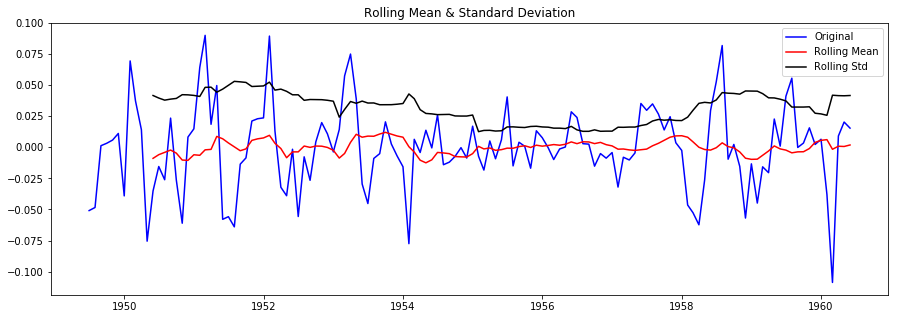

Hasil Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [17]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plt.figure(figsize=(15,5))
test_stationarity(ts_log_decompose)
plt.show()

Hasil dari Dickey-Fuller test menunjukkan nilai <b>kurang dari 1% Critical Value</b>. Dengan begitu, TS ini sangat mendekati <i>stationary</i>.